In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
w = np.loadtxt('water.csv', unpack = True, usecols = (5))
t = np.linspace(0, 3600*24*365, w.size)
t

array([0.00000000e+00, 9.01234568e+02, 1.80246914e+03, ...,
       3.15341975e+07, 3.15350988e+07, 3.15360000e+07])

(0.0, 31536000.0)

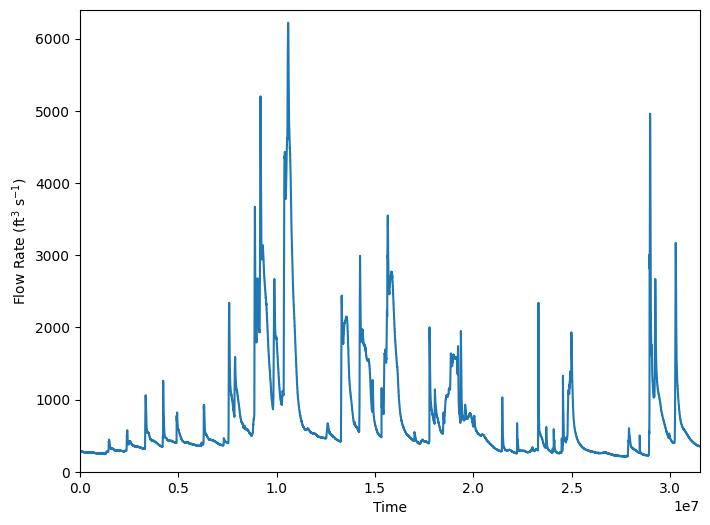

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(t, w)
plt.xlabel('Time')
plt.ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
plt.ylim(0, 6400)
plt.xlim(0, t[-1])

## Integration to find the total amount of water